In [1]:
#Imbalanced Classification Problem
#Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

from decimal import *
getcontext().prec = 17

## TOOLS

In [2]:
def compute_metrics(actual, predictions, predictions_scores):
    cm1 = confusion_matrix(actual, predictions)
    print("CONFUSION MATRIX")
    print(cm1)
    # TP / (TP + FN)
    print('SPECIFICITY: ', Decimal(cm1[1,1].item()) / (Decimal(cm1[1,0].item()) + Decimal(cm1[1,1].item())) )
    # TN / (TN + FP)
    print('SENSITIVITY: ', Decimal(cm1[0,0].item()) / (Decimal(cm1[0,0].item()) + Decimal(cm1[0,1].item())) )
    print('PRECISION: ', precision_score(actual, predictions))
    print('ACCURACY: ', accuracy_score(actual, predictions))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions_scores)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('AU: ', roc_auc)
    '''plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()'''

In [3]:
dataset1 = pd.read_excel("/Users/antonio/GitHub/ia/data.xlsx")
dataset1.head()

ID_studente  Genere  Diploma_scuola_sup  AreaGeografica_scuola_sup  \
0            1       1                   1                          3   
1            2       1                   1                          4   
2            3       1                   1                          4   
3            4       1                   1                          4   
4            5       1                   1                          3   

   Voto_scuola_sup  Voto_scuola_sup_classi  Età_immatricolazione  \
0            100.0                       1                     1   
1            100.0                       1                     1   
2            100.0                       1                     1   
3            100.0                       1                     1   
4            100.0                       1                     1   

   Situazione_OFA  Corso_di_studio_IDAggr  Scuola  Ciclo  Abbandoni  
0               1                     446       4      2          0  
1               1                     446       4      2          0  
2               2                     446       4      2          0  
3               1                     446       4      2          0  
4               2                     446       4      2          0

### Split test-training set

In [4]:
#Clean dataset
dataset = dataset1.drop(columns = ["ID_studente", "Voto_scuola_sup", "Situazione_OFA"] )

In [5]:
#The ratio of 0s to 1s is 1:7. This is a clear case of Imbalances class classification
X = dataset.drop('Abbandoni', axis=1)
y = dataset['Abbandoni']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
dataset.head()

Genere  Diploma_scuola_sup  AreaGeografica_scuola_sup  \
0       1                   1                          3   
1       1                   1                          4   
2       1                   1                          4   
3       1                   1                          4   
4       1                   1                          3   

   Voto_scuola_sup_classi  Età_immatricolazione  Corso_di_studio_IDAggr  \
0                       1                     1                     446   
1                       1                     1                     446   
2                       1                     1                     446   
3                       1                     1                     446   
4                       1                     1                     446   

   Scuola  Ciclo  Abbandoni  
0       4      2          0  
1       4      2          0  
2       4      2          0  
3       4      2          0  
4       4      2          0

## Cross validation

First version

In [15]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, random_state=1).split(X_train, y_train)

lr1 = LogisticRegression(solver="liblinear")

sm = SMOTE(k_neighbors=5, kind="svm")

scores = []
for k, (train, test) in enumerate(kfold):
    
    #ogni fold viene bilanciato
    X_train_bal, y_train_bal = sm.fit_sample(X_train.iloc[train], y_train.iloc[train])
    
    lr1.fit(X_train_bal, y_train_bal)
    actual = y_train.iloc[test]
    predictions = lr1.predict(X_train.iloc[test])
    predictions_scores = lr1.predict_proba(X_train.iloc[test])[:,1] # needed for roc calc
    
    print('\nFold: %s, Class dist.: %s' % (k+1, np.bincount(y_train_bal)))
    
    compute_metrics(actual=actual, predictions=predictions, predictions_scores=predictions_scores)
    #compute_prediction_classes_count(predictions=predictions)
    
#print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Fold: 1, Class dist.: [8112 8112]
CONFUSION MATRIX
[[688 214]
 [ 68  54]]
('SPECIFICITY: ', Decimal('0.44262295081967213'))
('SENSITIVITY: ', Decimal('0.76274944567627494'))
('PRECISION: ', 0.20149253731343283)
('ACCURACY: ', 0.724609375)
('AU: ', 0.631429246483225)

Fold: 2, Class dist.: [8112 8112]
CONFUSION MATRIX
[[666 236]
 [ 73  48]]
('SPECIFICITY: ', Decimal('0.39669421487603306'))
('SENSITIVITY: ', Decimal('0.73835920177383592'))
('PRECISION: ', 0.16901408450704225)
('ACCURACY: ', 0.6979472140762464)
('AU: ', 0.5959942093786077)

Fold: 3, Class dist.: [8112 8112]
CONFUSION MATRIX
[[632 270]
 [ 65  56]]
('SPECIFICITY: ', Decimal('0.46280991735537190'))
('SENSITIVITY: ', Decimal('0.70066518847006652'))
('PRECISION: ', 0.17177914110429449)
('ACCURACY: ', 0.6725317693059628)
('AU: ', 0.6166141357131077)

Fold: 4, Class dist.: [8112 8112]
CONFUSION MATRIX
[[623 279]
 [ 56  65]]
('SPECIFICITY: ', Decimal('0.53719008264462810'))
('SENSITIVITY: ', Decimal('0.69068736141906874'))
('PRE

Second version

In [14]:
from sklearn.metrics import confusion_matrix, recall_score, roc_auc_score, precision_score, accuracy_score
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)
lr1 = LogisticRegression(solver="liblinear")

scores = []
for k, (train, test) in enumerate(kfold):
    lr1.fit(X_train.iloc[train], y_train.iloc[train])

    actual = y_train.iloc[test]
    predictions = lr1.predict(X_train.iloc[test])    
    score = accuracy_score(actual, predictions)
    scores.append(score)
    print('Fold: %s, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train.iloc[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


Fold: 1, Class dist.: [8112 1089], Acc: 0.881
Fold: 2, Class dist.: [8112 1090], Acc: 0.882
Fold: 3, Class dist.: [8112 1090], Acc: 0.882
Fold: 4, Class dist.: [8112 1090], Acc: 0.882
Fold: 5, Class dist.: [8113 1090], Acc: 0.882
Fold: 6, Class dist.: [8113 1090], Acc: 0.882
Fold: 7, Class dist.: [8113 1090], Acc: 0.882
Fold: 8, Class dist.: [8113 1090], Acc: 0.882
Fold: 9, Class dist.: [8113 1090], Acc: 0.882
Fold: 10, Class dist.: [8113 1090], Acc: 0.882

CV accuracy: 0.882 +/- 0.000


In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbPipeline

pipe = imbPipeline([
    ('oversample', SMOTE(k_neighbors=5, kind="borderline2")),
    ('clf', LogisticRegression(solver="liblinear"))
    ])

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=-1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

KeyboardInterrupt: 

### Curve di convalida

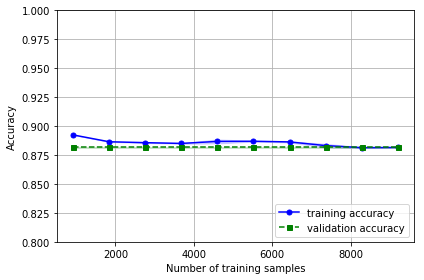

In [108]:
from sklearn.model_selection import learning_curve

#pipe_lr = Pipeline([('scl', StandardScaler()),
#                    ('clf', LogisticRegression(penalty='l2', random_state=0))])
lr1 = LogisticRegression(random_state=1, solver="liblinear")

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=lr1,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()